### 偏导数
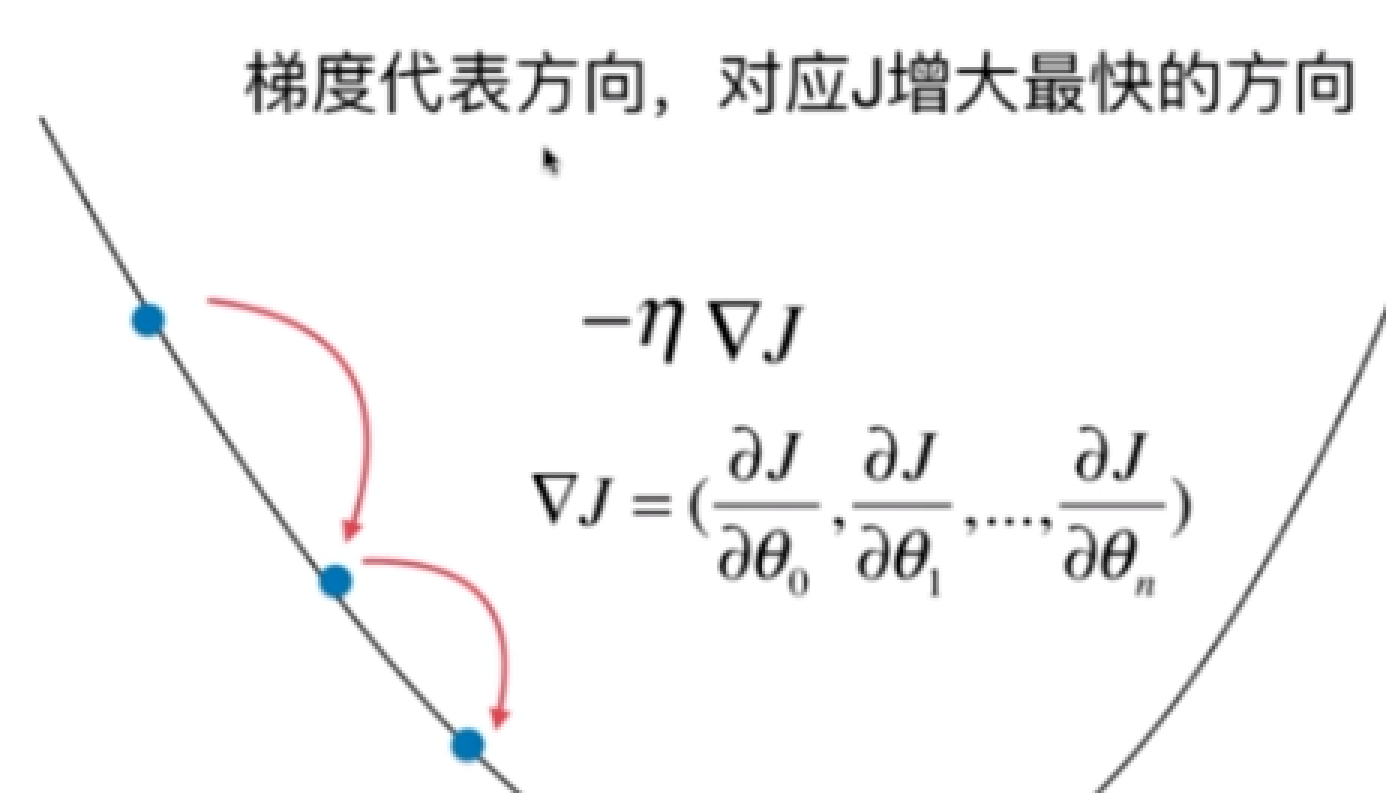

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(666)
x = 2*np.random.random(size=100)
y = x*3. +4.+np.random.normal(size=100)
X = x.reshape(-1,1)
X.shape
y.shape

In [ ]:
plt.scatter(x, y)


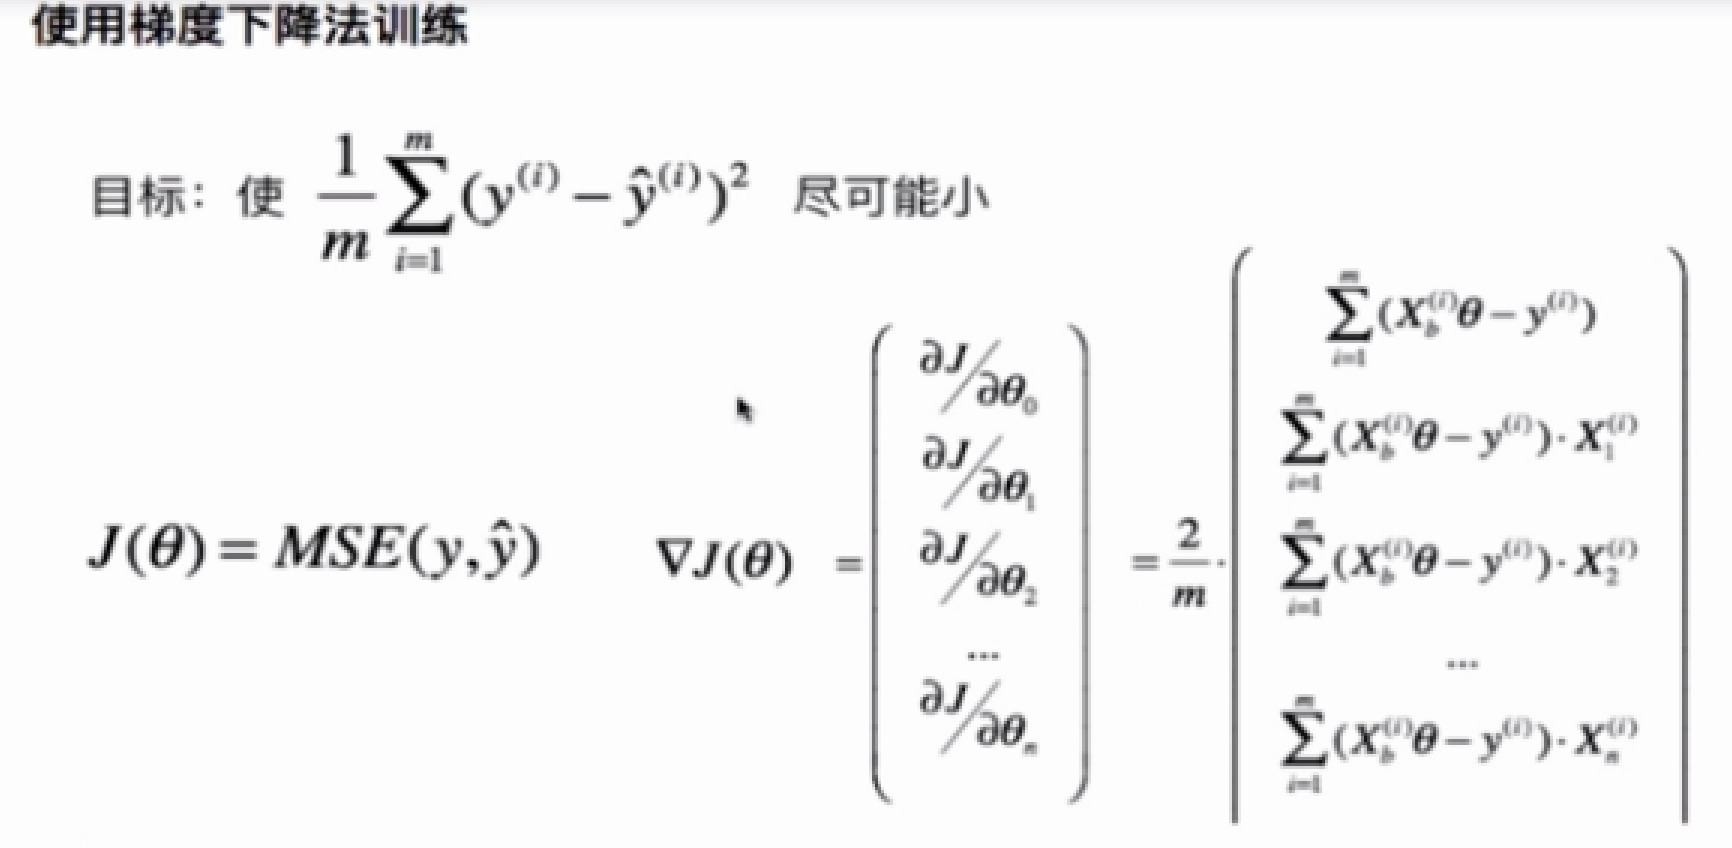

In [ ]:
def J(theta, X_b, y):
    try:
        return np.sum((y-X_b.dot(theta))**2) / len(X_b)
    except:
        return float("inf")

In [ ]:
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
    return res * 2 / len(X_b)

In [ ]:
def gradient_descent(X_b, y, initial_theta, eta, n_iters = 1e4, epsilon = 1e-8):
    
    theta = initial_theta
    i_iter = 0
#     theta_history.append(theta)
    
    while i_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
#         theta_history.append(theta)
        
        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
            
        i_iter += 1
        
    return theta

In [ ]:
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

theta = gradient_descent(X_b, y, initial_theta, eta)

In [ ]:
theta

In [ ]:
import os
import sys
sys.path.append("E:\workspace\PycharmProjects\Pattern-Recognition\playML")
from playML.LinearRegression import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit_gb(X,y)

In [ ]:
lin_reg.coef_

In [ ]:
lin_reg.interception_

### 梯度下降法的优势


In [12]:
m = 1000
n = 5000
from playML.LinearRegression import LinearRegression
big_X = np.random.normal(size=(m, n))
true_theta = np.random.uniform(0., 100., size = 1+n)
big_y = big_X.dot(true_theta[1:]) +true_theta[0] + np.random.normal(0., 10., size = m)


In [13]:
big_reg1 = LinearRegression()
%time big_reg1.fit_normal(big_X, big_y)

Wall time: 11.9 s


LinearRegression

In [ ]:
big_reg2 = LinearRegression()
%time big_reg2.fit_gd(big_X, big_y)